<a href="https://colab.research.google.com/github/fedemoss/HelmholtzCage/blob/main/Variaciones_en_tama%C3%B1o_de_bobinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**El objetivo de este código es estudiar como varia la homogeneidad para las bobinas cuadradas y circulares al variar el tamaño de una de las bobinas de un par (es decir, no son iguales)**

In [ ]:
import math
import numpy as np
from scipy.integrate import quad
from numpy import sqrt, sin, cos, pi
from matplotlib import pyplot as plt

In [ ]:
## Constantes:
## Todo está en SI:

N = 40  ## Número de vueltas
I = 1   ## corriente
u0 = 1.256637062* 10 ** (-6)   ## permeabilidad magnética del vacío
C = u0 * N * I / (4 * np.pi)

**DEFINICIÓN CAMPO DE JAULA CIRCULAR (ES PARA UN PAR CON SEPARACIÓN D, DE RADIO R, HAY QUE INTEGRAR ESTAS EXPRESIONES)**

In [ ]:
## Término que aparece en común para todos los campos

def terminoDivisorup(u, z, x, y, r, d):
    return ((z + d/2)**2 + (x - r * cos(u))**2 + (y - r * sin(u))**2)**(3/2)
  
def terminoDivisordown(u, z, x, y, r, d):
    return ((z - d/2)**2 + (x - r * cos(u))**2 + (y - r * sin(u))**2)**(3/2) 

## Campo en la dirección axial para las dos bobinas en cartesianas (Bz)

def dBzup(u, z, x, y, r, d):
    return 10**(-7) * r * N * I * (r - x * cos(u) - y * sin(u)) / terminoDivisorup(u, z, x, y, r, d)

def dBzdown(u, z, x, y, r, d):
    return 10**(-7) * r * N * I * (r - x * cos(u) - y * sin(u)) / terminoDivisordown(u, z, x, y, r, d) 

## Componente x del campo (par de bobinas)

def dBxup(u, z, x, y, r, d):
    return 10**(-7) * r * N * I * (z + d/2) * cos(u)/terminoDivisorup(u, z, x, y, r, d)
 
def dBxdown(u, z, x, y, r, d):
    return 10**(-7) * r * N * I * (z - d/2) * cos(u)/terminoDivisordown(u, z, x, y, r, d)

## Componente y del campo (par de bobinas)

def dByup(u, z, x, y, r, d):
    return 10**(-7) * r * N * I * (z + d/2) * sin(u)/terminoDivisorup(u, z, x, y, r, d)
 
def dBydown(u, z, x, y, r, d):
    return 10**(-7) * r * N * I * (z - d / 2) * sin(u)/terminoDivisordown(u, z, x, y, r, d)

**DEFINICIÓN DE CAMPO DE JAULA CUADRADA (PARA UN PAR CON SEPARACIÓN D, LADO L, SÓLO COMPONENTE Z)**

In [ ]:
## La expresión es muy grande por lo tanto la separamos en varias partes
## bobinas a d/2 y -d/2 en el eje z con respecto al centro

def SBz1up(z, x, y, l, d):
    factorcomun = (x + l / 2)/((x + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz2up(z, x, y, l, d):
    factorcomun = (x - l / 2)/((x - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz3up(z, x, y, l, d):
    factorcomun = (y + l / 2)/((y + l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y + l / 2) ** 2 + (z + d / 2) ** 2)     ## ojo acá
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz4up(z, x, y, l, d):
    factorcomun = (y - l / 2)/((y - l / 2) ** 2 + (z + d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y - l / 2) ** 2 + (z + d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z + d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

## Este es el resultado que importa

def SBzup(z, x, y, l, d):
    return SBz1up(z, x, y, l, d) - SBz2up(z, x, y, l, d) + SBz3up(z, x, y, l, d) - SBz4up(z, x, y, l, d)

## definición del campo para una de las bobinas

def SBz1down(z, x, y, l, d):
    factorcomun = (x + l / 2)/((x + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz2down(z, x, y, l, d):
    factorcomun = (x - l / 2)/((x - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - y) / np.sqrt((y - l /2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + y) / np.sqrt((y + l / 2) ** 2 + (x - l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz3down(z, x, y, l, d):
    factorcomun = (y + l / 2)/((y + l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y + l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y + l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

def SBz4down(z, x, y, l, d):
    factorcomun = (y - l / 2)/((y - l / 2) ** 2 + (z - d / 2) ** 2)
    izquierda = (l / 2 - x) / np.sqrt((x - l /2) ** 2 + (y - l / 2) ** 2 + (z - d / 2) ** 2)
    derecha = (l / 2 + x) / np.sqrt((y - l / 2) ** 2 + (x + l / 2) ** 2 + (z - d / 2) ** 2)
    return C * factorcomun * (izquierda + derecha)

## Este es el otro resultado que importa

def SBzdown(z, x, y, l, d):
    return SBz1down(z, x, y, l, d) - SBz2down(z, x, y, l, d) + SBz3down(z, x, y, l, d) - SBz4down(z, x, y, l, d)

**Cálculo de las variaciones de la homogeneidad para la circular**

In [ ]:
## ERROR de construcción: ensanchamiento dL [CIRCULAR]
## La idea es variar el tamaño de una de las bobinas, sumandole un cachito dL
## de longitud a una de ellas, e iterar en un array de estos valores, en base
## a eso, ver como cambia la homogeneidad

r = 0.5  # radio de la bobina
d = r    # distancia ideal
dL = np.linspace(0, 0.05, 50) # array de desfasajes de tamaño
dimensionx = 1   # dimensiones del cubesat
dimensiony = 1   
dimensionz = 1 
x = dimensionx/20 # bordes del CubeSat (5cm)
y = dimensiony/20 # bordes del CubeSat (5cm)
z = np.linspace(0, dimensionz / 20, 200) # vamos a ver desde el punto (x, y, 0) hasta el borde del CubeSat (x, y, 5cm)
Bzcircle = np.zeros(len(z))  # array para el campo en z, variando en z
HomogeneidadC = np.zeros(len(dL))  # array donde se guardan los valores de homogeneidad para la variación en el tamaño

## Iteramos en cada valor del array de dL, y evaluamos el campo en cada punto z,
## en el cálculo del campo le sumamos el valor dL correspondiente a la iteración
## a una de las bobinas (sería un desfasaje global)
## para cada valor de dL guardamos la homogeneidad en HomogeneidadC

for h in range(len(dL)):
  for i in range(len(z)):
    # integral numérica en cuadraturas
    Lz = quad(dBzup, 0, 2*np.pi, args=(z[i], x, y, r + dL[h], d)) + quad(dBzdown, 0, 2*np.pi, args=(z[i], x, y, r, d))
    # Valores del campo al variar en z
    Bzcircle[i] = (Lz[0] + Lz[2]) * 10 ** 6
  #Campo en el centro
  Lz0 = quad(dBzup, 0, 2*np.pi, args=(0, 0, 0, r + dL[h], d)) + quad(dBzdown, 0, 2*np.pi, args=(0, 0, 0, r, d))
  Bz0 = (Lz0[0] + Lz0[2]) * 10 ** 6
  # Array de homogeneidad
  HomogeneidadC[h] = max(abs(Bzcircle - Bz0) / abs(Bz0)) * 10 ** 6
  
## Esto es para ponerlo de forma porcentual, así comparamos con la cuadrada
ensanchamientocircular = (dL / (2 * r)) * 100

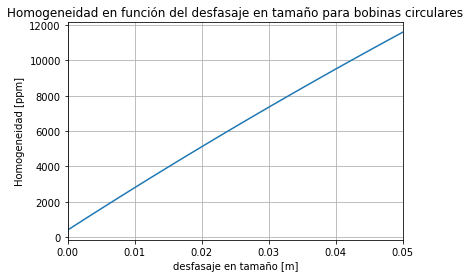

In [ ]:
## Gráfico de homogeneidad versús dL (el desfasaje de tamaño) para la circular

plt.plot(dL, HomogeneidadC)
plt.xlabel('desfasaje en tamaño [m]')
plt.ylabel('Homogeneidad [ppm]')
plt.title('Homogeneidad en función del desfasaje en tamaño para bobinas circulares')
plt.xlim(0,0.05)
#plt.ylim()
plt.grid()
plt.show()

In [ ]:
## Lo mismo que antes pero para la bobina cuadrada

l = 1   # longitud de la bobina
d = 0.5445 * l  # distancia ideal
dL = np.linspace(0, 0.05, 50) # Hasta 5 cm de defasaje 
dimensiony = 1  # tamaño del cubesat (luego se divide para obtenerlo en cm)
dimensionz = 1  # tamaño del cubesat
dimensionc = 1
y = dimensiony/20  # Borde del CubeSat (5cm)
x = dimensionx/20  # Borde del CubeSat (5cm)
z = np.linspace(0, dimensionz / 20, 200) # vamos a ver desde el punto (x, y, 0) hasta el borde del CubeSat (x, y, 5cm)
Bzsquare = np.zeros(len(z))  # array para el campo en z, variando en z
HomogeneidadS = np.zeros(len(dL))  # array donde se guardan los valores de homogeneidad para la variación en z

## Lo mismo que en la circular, nada más que no es necesario realizar la integral numérica

for h in range(len(dL)):
    for i in range(len(z)):
        Bzsquare[i] = SBzdown(z[i], x, y, l, d) + SBzup(z[i], x, y, l + dL[h], d) 
    
    Bz0 = SBzdown(0, 0, 0, l, d) + SBzup(0, 0, 0, l + dL[h], d)
    HomogeneidadS[h] = max(abs(Bzsquare - Bz0) / abs(Bz0)) * 10 ** 6  

## Ensanchamiento de forma porcentual, para comparar con la circular
ensanchamientocuadrado = (dL / l) * 100

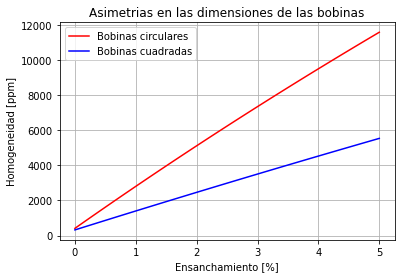

In [ ]:
#Gráfico comparativo del ensanchamiento del tamaño (porcentaje), para la bobina circular y cuadrada

plt.plot(ensanchamientocircular, HomogeneidadC,'red')
plt.plot(ensanchamientocuadrado, HomogeneidadS,'blue')
plt.xlabel('Ensanchamiento [%]')
plt.ylabel('Homogeneidad [ppm]')
plt.legend(['Bobinas circulares', 'Bobinas cuadradas'])
plt.title('Asimetrias en las dimensiones de las bobinas')
plt.grid()
plt.show()